In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import matplotlib

In [2]:
candidates_df = pd.read_csv('C:/Users/yifen/OneDrive - The University of Chicago/Research/_Data/Broader_Screen_Revised.csv')[2674:]
candidates_id = candidates_df['Catalog'].values
bs_candidates_id = np.loadtxt('BS candidate catalog.txt').astype(int)

In [3]:
candidates_df

Catalog                                             SMILES   LPS Abs  \
2674   86846            CC1CC(C)CN(C(=O)CSc2nnc(Cc3ccccc3)o2)C1  1.057483   
2675   86849       O=C(CSc1nnc(COc2ccc(Cl)cc2)o1)N1CCCc2ccccc21  1.122172   
2676   87307       O=C(CCCn1c(=O)[nH]c2ccc(Br)cc2c1=O)NCC1CCCO1  1.050587   
2677   87450               O=C(CSC1CCCCC1)Nc1cc(C(F)(F)F)ccc1Cl  1.379358   
2678   87640  COc1ccc(Cn2cc3c(-c4ccc(F)cc4)nnc-3c3cc(OC)c(OC...  1.169056   
...      ...                                                ...       ...   
5549   27374             CC(C)(C)n1cnc2cc(N=Cc3ccc(Cl)cc3)ccc21  1.006525   
5550   26799                 Br.CCCCn1c(=N)n(CC(=O)OC)c2ccccc21  0.956586   
5551   27999  COc1ccc(C=NNC(=O)CSc2nnc(-c3ccccc3)n2-c2ccccc2...  1.142430   
5552   28078           NS(=O)(=O)c1ccc2c(c1)C1C=CCC1C(C(=O)O)N2  0.991677   
5553   28134  COc1ccc(Cn2c(SC)nc3c(c2=O)C2(CCCCC2)Cc2ccccc2-...  0.855563   

      LPS Abs Std   LPS Lum  LPS Lum Std  MPLA Abs  MPLA Abs Std  MPLA Lum  \
2674     0.091516  0.943616     0.093208  0.878507      0.106120  0.858466   
2675     0.106291  0.822708     0.049758  0.852565      0.085912  0.866192   
2676     0.099050  1.037873     0.062692  0.931217      0.043361  0.940068   
2677     0.109126  2.202194     0.157303  1.388910      0.063141  1.471926   
2678     0.132158  2.417783     0.180772  2.164304      0.104753  2.998256   
...           ...       ...          ...       ...           ...       ...   
5549     0.122551  0.804812     0.048437  1.396672      0.054982  0.995850   
5550     0.080515  1.001644     0.055440  1.051757      0.059124  1.145570   
5551     0.074061  0.958079     0.056154  1.085077      0.044989  1.002756   
5552     0.145665  0.930955     0.054687  1.006768      0.074656  1.011694   
5553     0.075657  0.995088     0.076425  1.145443      0.197739  1.329806   

      MPLA Lum Std   CpG Abs  CpG Abs Std  cGAMP Abs  cGAMP Abs Std  \
2674      0.342546  0.917434     0.048402   1.047746       0.050156   
2675      0.288916  0.882671     0.044305   0.952387       0.038143   
2676      0.253379  0.964932     0.081213   0.970733       0.038682   
2677      0.429895  0.516402     0.045549   1.025258       0.047873   
2678      0.346146  0.318330     0.026301   1.181461       0.058561   
...            ...       ...          ...        ...            ...   
5549      0.105306  1.211356     0.136207   1.042664       0.205587   
5550      0.145737  1.128821     0.102029   0.955518       0.139085   
5551      0.076116  1.144677     0.090873   0.985421       0.140360   
5552      0.089445  0.585618     0.048510   0.875279       0.128811   
5553      0.249561  1.430632     0.444689   0.706461       0.100712   

      cGAMP Lum  cGAMP Lum Std  LMCpG Abs  LMCpG Abs Std  LMcGAMP Lum  \
2674   1.012030       0.071503   0.951141       0.085595     0.938037   
2675   0.884555       0.044088   0.952469       0.082949     0.857819   
2676   0.956739       0.056751   0.982246       0.078074     0.978226   
2677   1.450970       0.135030   1.094890       0.077395     1.708363   
2678   1.794356       0.117465   1.217230       0.098540     2.403465   
...         ...            ...        ...            ...          ...   
5549   0.888231       0.059418   1.204851       0.110445     0.896298   
5550   0.955432       0.054814   1.045721       0.082438     1.034215   
5551   0.844584       0.058798   1.124061       0.072496     0.935140   
5552   0.800125       0.043354   0.861354       0.098565     0.914258   
5553   0.791268       0.099078   1.143879       0.284355     1.038721   

      LMcGAMP Lum Std  
2674         0.209076  
2675         0.171165  
2676         0.154221  
2677         0.275552  
2678         0.235438  
...               ...  
5549         0.075202  
5550         0.095424  
5551         0.064302  
5552         0.065500  
5553         0.161181  

[2880 rows x 20 columns]

In [4]:
X_embed = np.load('TSNE_64_12.npy')
X_embed.shape

(142672, 2)

## BS each round

In [5]:
candidates_df['iteration'] = [1] * 720 + [2] * 720 + [3] * 720 + [4] * 720

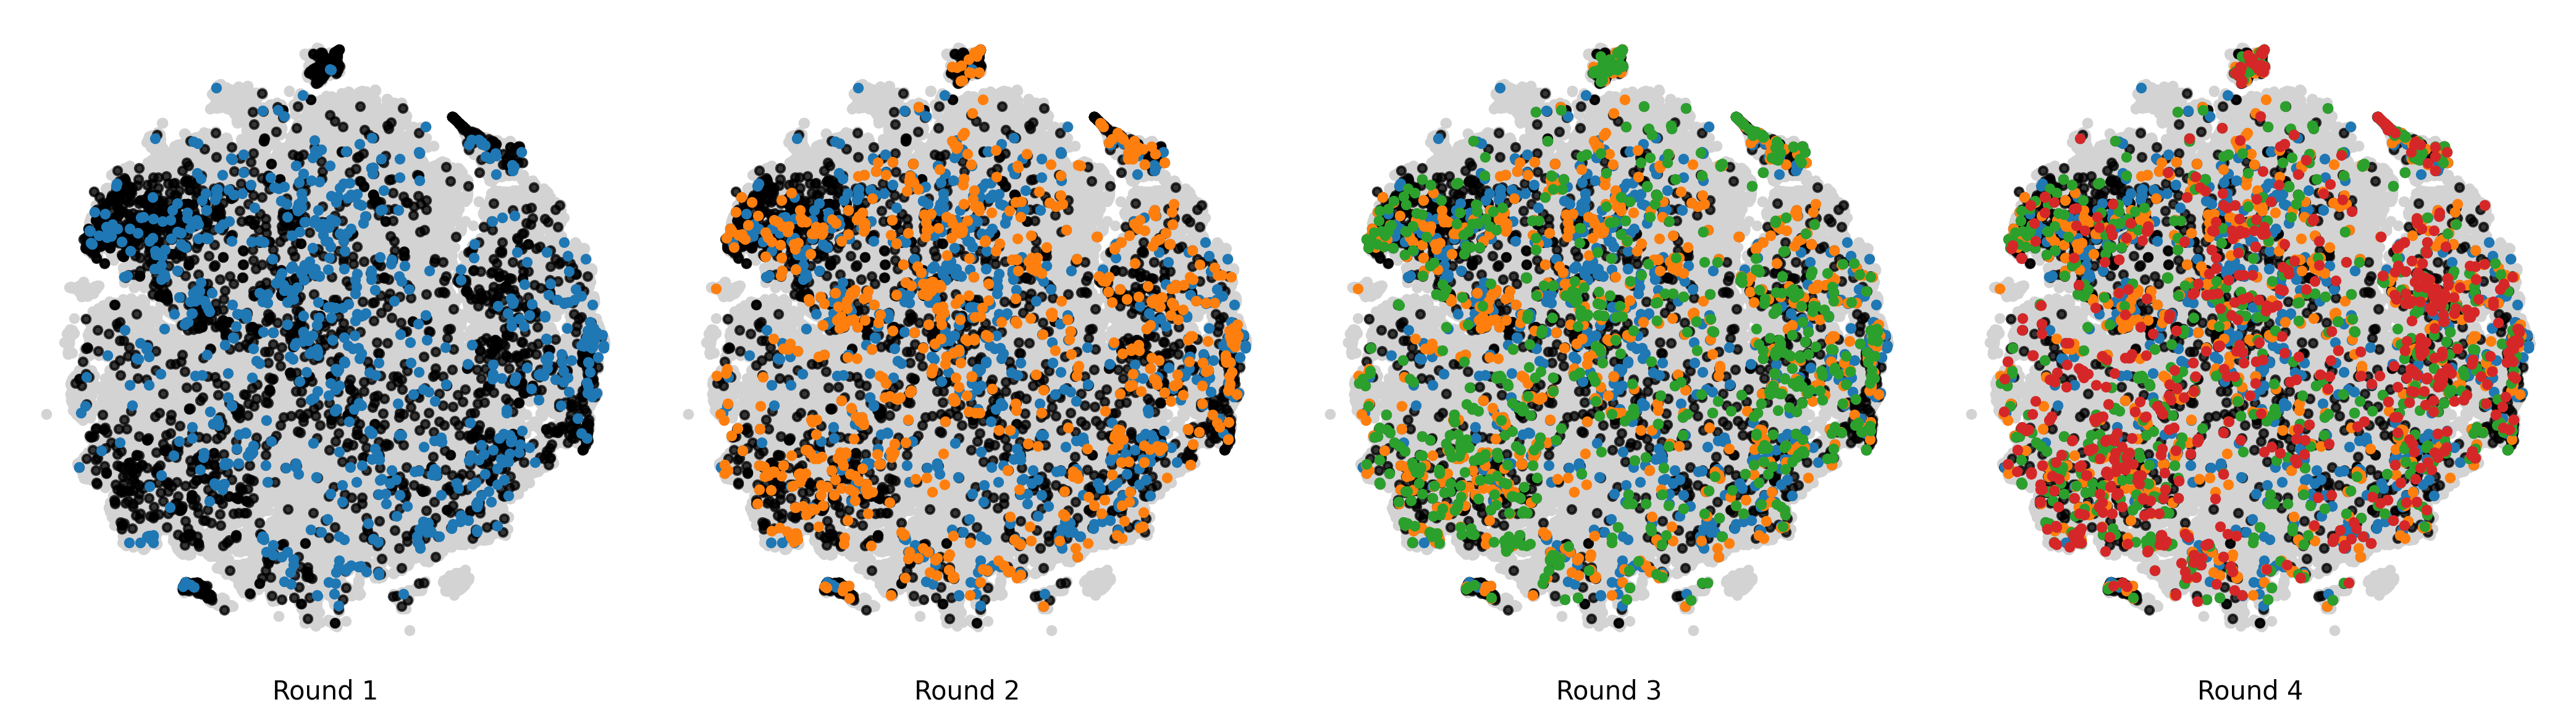

In [6]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 4, figsize=(14, 4), dpi=300)

name_iter = [1, 2, 3, 4]
current_cand_id_list = [candidates_df[candidates_df['iteration'] == i]['Catalog'].values.astype('int') for i in name_iter]
for i in range(4):
    current_cand_id = current_cand_id_list[i]
    ax = axs[i]
    ax.scatter(X_embed[:-2674,0], X_embed[:-2674,1], label='Compound searching space', s=10, color='lightgrey')
    ax.scatter(X_embed[-2674:,0], X_embed[-2674:,1], s=10, color='black', alpha=0.75)
    for j in range(i+1):
        ax.scatter(X_embed[current_cand_id_list[j],0], X_embed[current_cand_id_list[j],1], s=10, alpha=1)
    # ax.scatter(X_umap[current_cand_id,0], X_umap[current_cand_id,1], label='Compounds screened\nin this round', s=20, color='tab:orange')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    # ax.set_title(f'{name_iter[i]} round')
    ax.set_xlabel(f'Round {name_iter[i]}')
    ax.set_frame_on(False)

plt.tight_layout()
plt.show()

## Plot latent space density

In [7]:
import scipy.stats as st

In [8]:
x = X_embed[:, 0]
y = X_embed[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

-58.56586685180664 59.299383544921874 -58.745050048828126 59.184228515625


In [9]:
# z = kernel(values)
# np.save('z-kernel.npy', z)
z = np.load('z-kernel.npy')

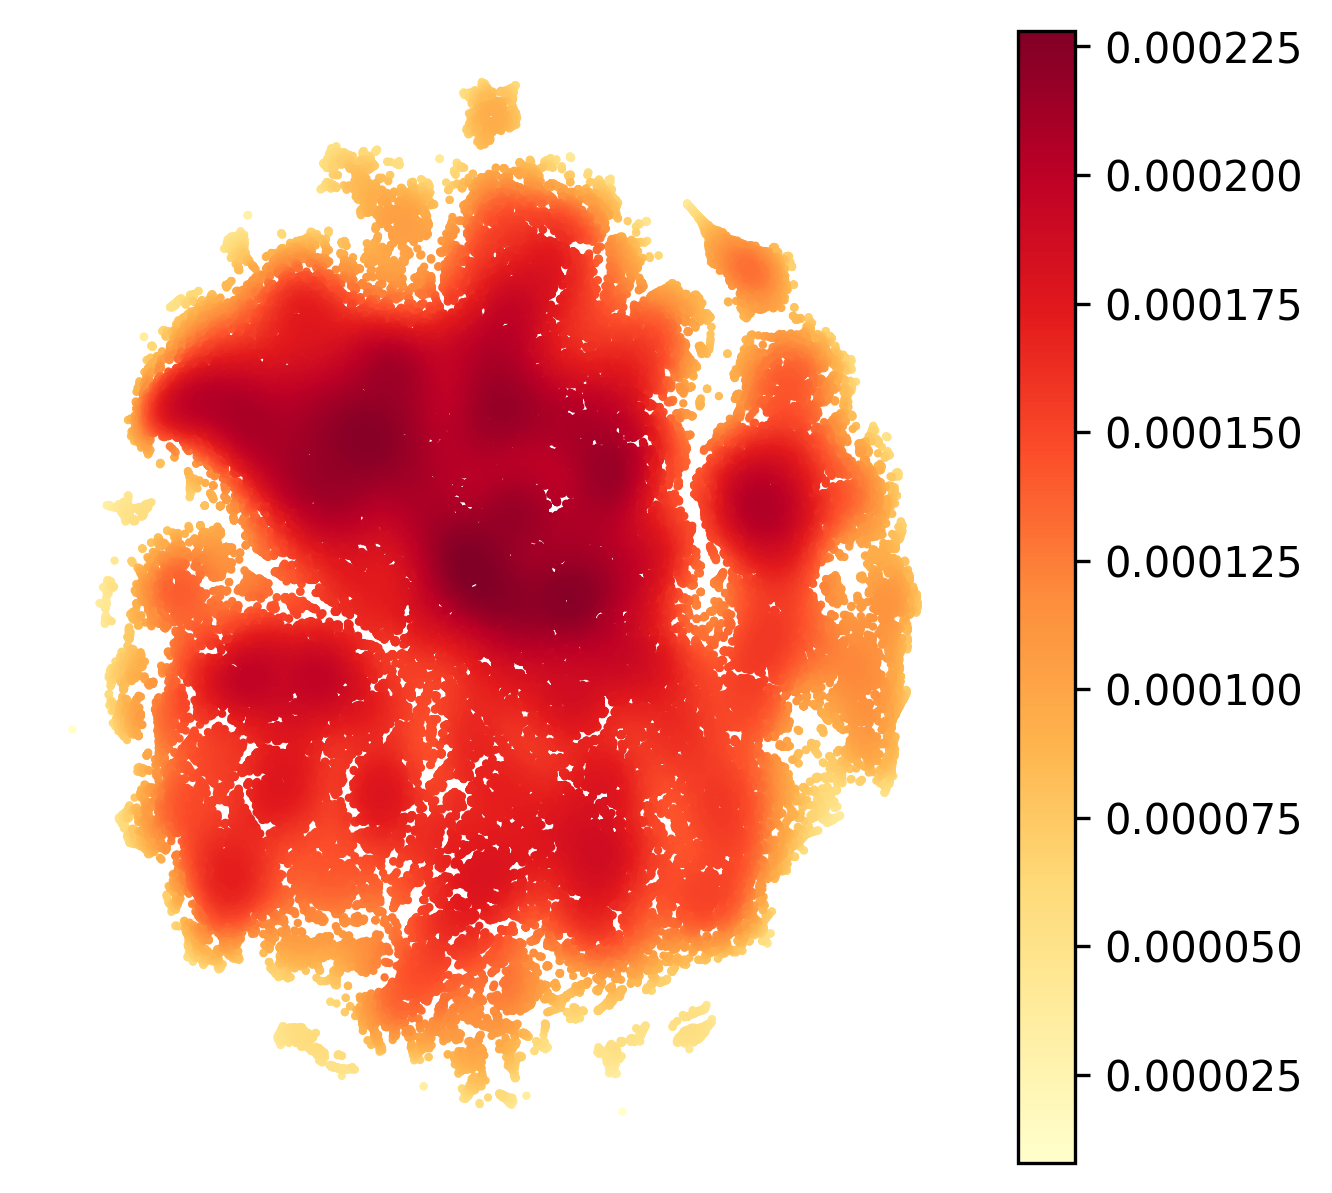

In [10]:
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(5,5), dpi=300)
# plt.scatter(X_embed[np.argsort(mw),0], X_embed[np.argsort(mw),1], c=mw[np.argsort(mw)], cmap='Spectral', norm=LogNorm(), s=1)
# plt.scatter(X_embed[:,0], X_embed[:,1], c='lightgrey', s=5)
plt.scatter(x, y, c=z, s=1, cmap='YlOrRd')
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.colorbar()
plt.show()

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

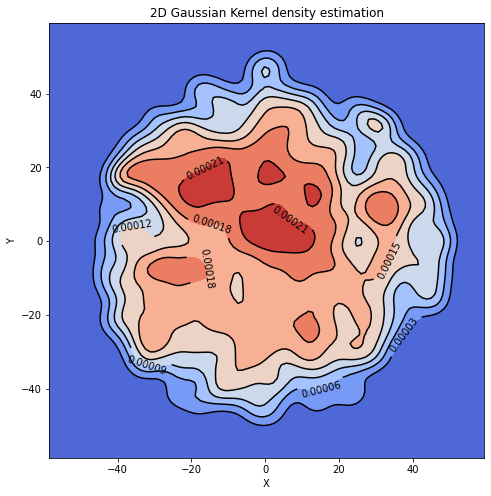

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [12]:
ps_id = np.arange(2674) + 139998
candidates_df_2 = pd.read_csv('C:/Users/yifen/OneDrive - The University of Chicago/Research/_Data/Broader_Screen_Revised.csv')
candidates_df_2.iloc[:2674, 0] = ps_id
candidates_df_2

Catalog                                             SMILES   LPS Abs  \
0     139998  CN(C)CCC(CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=O)c2cc...  0.429047   
1     139999  Cc1ccc(F)c(NC(=O)Nc2ccc(-c3cccc4[nH]nc(N)c34)c...  1.059638   
2     140000                 CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1  1.142072   
3     140001    CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)n[nH]c2c1  0.906733   
4     140002  CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...  0.941749   
...      ...                                                ...       ...   
5549   27374             CC(C)(C)n1cnc2cc(N=Cc3ccc(Cl)cc3)ccc21  1.006525   
5550   26799                 Br.CCCCn1c(=N)n(CC(=O)OC)c2ccccc21  0.956586   
5551   27999  COc1ccc(C=NNC(=O)CSc2nnc(-c3ccccc3)n2-c2ccccc2...  1.142430   
5552   28078           NS(=O)(=O)c1ccc2c(c1)C1C=CCC1C(C(=O)O)N2  0.991677   
5553   28134  COc1ccc(Cn2c(SC)nc3c(c2=O)C2(CCCCC2)Cc2ccccc2-...  0.855563   

      LPS Abs Std   LPS Lum  LPS Lum Std  MPLA Abs  MPLA Abs Std  MPLA Lum  \
0        0.185261  0.235876     0.285951  0.466092      0.021567  0.662699   
1        0.326106  0.670909     0.308059  1.717622      0.093615  0.665347   
2        0.180019  0.842144     0.287864  0.990261      0.045344  0.638505   
3        0.198435  0.499995     0.177106  1.035528      0.043380  0.404003   
4        0.237242  0.203873     0.090010  1.882761      0.086353  0.801812   
...           ...       ...          ...       ...           ...       ...   
5549     0.122551  0.804812     0.048437  1.396672      0.054982  0.995850   
5550     0.080515  1.001644     0.055440  1.051757      0.059124  1.145570   
5551     0.074061  0.958079     0.056154  1.085077      0.044989  1.002756   
5552     0.145665  0.930955     0.054687  1.006768      0.074656  1.011694   
5553     0.075657  0.995088     0.076425  1.145443      0.197739  1.329806   

      MPLA Lum Std   CpG Abs  CpG Abs Std  cGAMP Abs  cGAMP Abs Std  \
0         0.024266  0.271617     0.009875   0.800290       0.117496   
1         0.041842  1.292867     0.048164   1.785023       0.261555   
2         0.028428  0.972046     0.034397   0.911268       0.137567   
3         0.015587  0.847464     0.034683   0.866209       0.129657   
4         0.030832  0.219214     0.011005   1.344468       0.242787   
...            ...       ...          ...        ...            ...   
5549      0.105306  1.211356     0.136207   1.042664       0.205587   
5550      0.145737  1.128821     0.102029   0.955518       0.139085   
5551      0.076116  1.144677     0.090873   0.985421       0.140360   
5552      0.089445  0.585618     0.048510   0.875279       0.128811   
5553      0.249561  1.430632     0.444689   0.706461       0.100712   

      cGAMP Lum  cGAMP Lum Std  LMCpG Abs  LMCpG Abs Std  LMcGAMP Lum  \
0      0.460783       0.244820   0.388919       0.107834     0.453120   
1      0.114344       0.048236   1.356709       0.197846     0.483533   
2      0.573153       0.414681   1.034793       0.109005     0.684601   
3      0.045475       0.035259   0.929909       0.118970     0.316491   
4      0.331291       0.012988   1.014574       0.145902     0.445659   
...         ...            ...        ...            ...          ...   
5549   0.888231       0.059418   1.204851       0.110445     0.896298   
5550   0.955432       0.054814   1.045721       0.082438     1.034215   
5551   0.844584       0.058798   1.124061       0.072496     0.935140   
5552   0.800125       0.043354   0.861354       0.098565     0.914258   
5553   0.791268       0.099078   1.143879       0.284355     1.038721   

      LMcGAMP Lum Std  
0            0.217787  
1            0.181639  
2            0.291910  
3            0.104647  
4            0.055441  
...               ...  
5549         0.075202  
5550         0.095424  
5551         0.064302  
5552         0.065500  
5553         0.161181  

[5554 rows x 20 columns]

In [13]:
X_all = np.load('TSNE_64_12.npy')
X_exp = X_all[candidates_df_2['Catalog'].values.astype(int)]
X_exp.shape

(5554, 2)

In [14]:
objs = np.array([['LPS Abs',
        'MPLA Abs',
        'CpG Abs',
        'LMCpG Abs'],
        ['LPS Lum',
        'MPLA Lum',
        'cGAMP Lum',
        'LMcGAMP Lum']])

vmin_abs = candidates_df_2[['LPS Abs',
        'MPLA Abs',
        'CpG Abs',
        'LMCpG Abs']].applymap(lambda x: np.log2(x)).min().min()
vmax_abs = candidates_df_2[['LPS Abs',
        'MPLA Abs',
        'CpG Abs',
        'LMCpG Abs']].applymap(lambda x: np.log2(x)).max().max()
# vmax = 1/vmin
vmin_lum = candidates_df_2[['LPS Lum',
        'MPLA Lum',
        'cGAMP Lum',
        'LMcGAMP Lum']].applymap(lambda x: np.log2(x)).min().min()
vmax_lum = candidates_df_2[['LPS Lum',
        'MPLA Lum',
        'cGAMP Lum',
        'LMcGAMP Lum']].applymap(lambda x: np.log2(x)).max().max()

Text(0, 0.5, 'IRF')

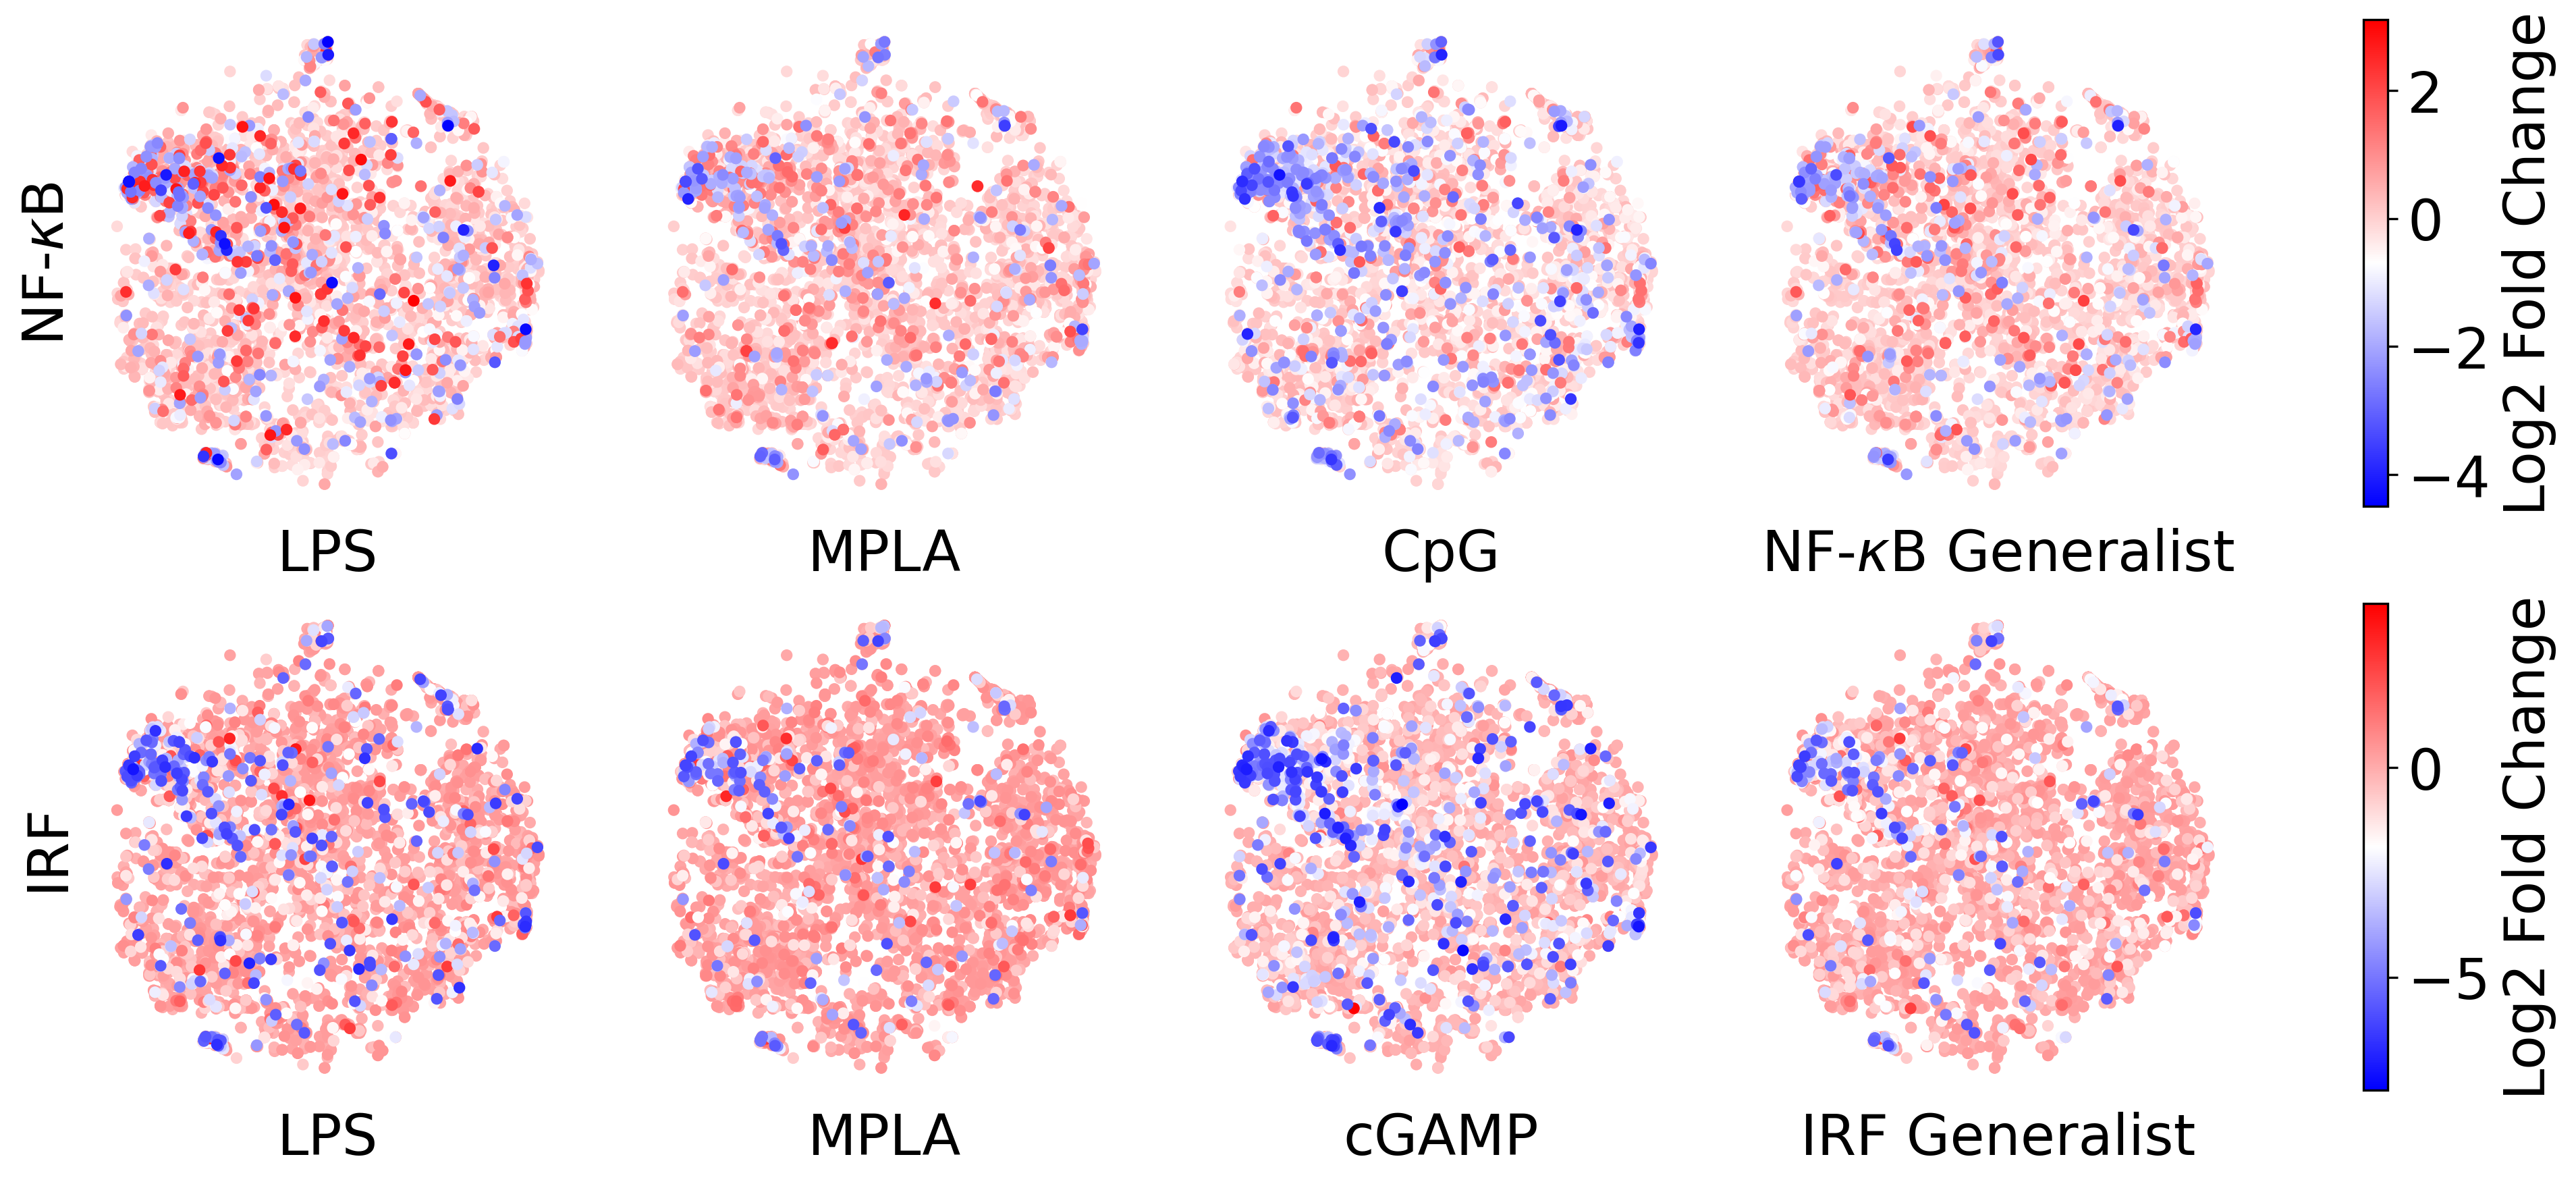

In [15]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(2,4, figsize=(17,7), dpi=300)
for i in range(2):
    if i == 0:
        vmin, vmax = vmin_abs, vmax_abs
    if i == 1:
        vmin, vmax = vmin_lum, vmax_lum
    for j in range(4):
        obj = objs[i,j]
        ax = axs[i,j]
        ax.set_frame_on(False)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        sorted_series = candidates_df_2[obj].sort_values(key=lambda x: np.abs(np.log2(x)))
        pcm = ax.scatter(
            X_exp[sorted_series.index,0], 
            X_exp[sorted_series.index,1], 
            s=10, 
            c=sorted_series.apply(lambda x: np.log2(x)), 
            cmap='bwr',
            norm=Normalize(vmin=vmin, vmax=vmax)
        )
        ax.set_xlabel(obj.split()[0])
    fig.colorbar(pcm, ax=axs[i,:], label='Log2 Fold Change')
axs[0,3].set_xlabel('NF-$\kappa$B Generalist')#, fontsize=16)
axs[1,3].set_xlabel('IRF Generalist')#, fontsize=16)
axs[0,0].set_ylabel('NF-$\kappa$B')
axs[1,0].set_ylabel('IRF')

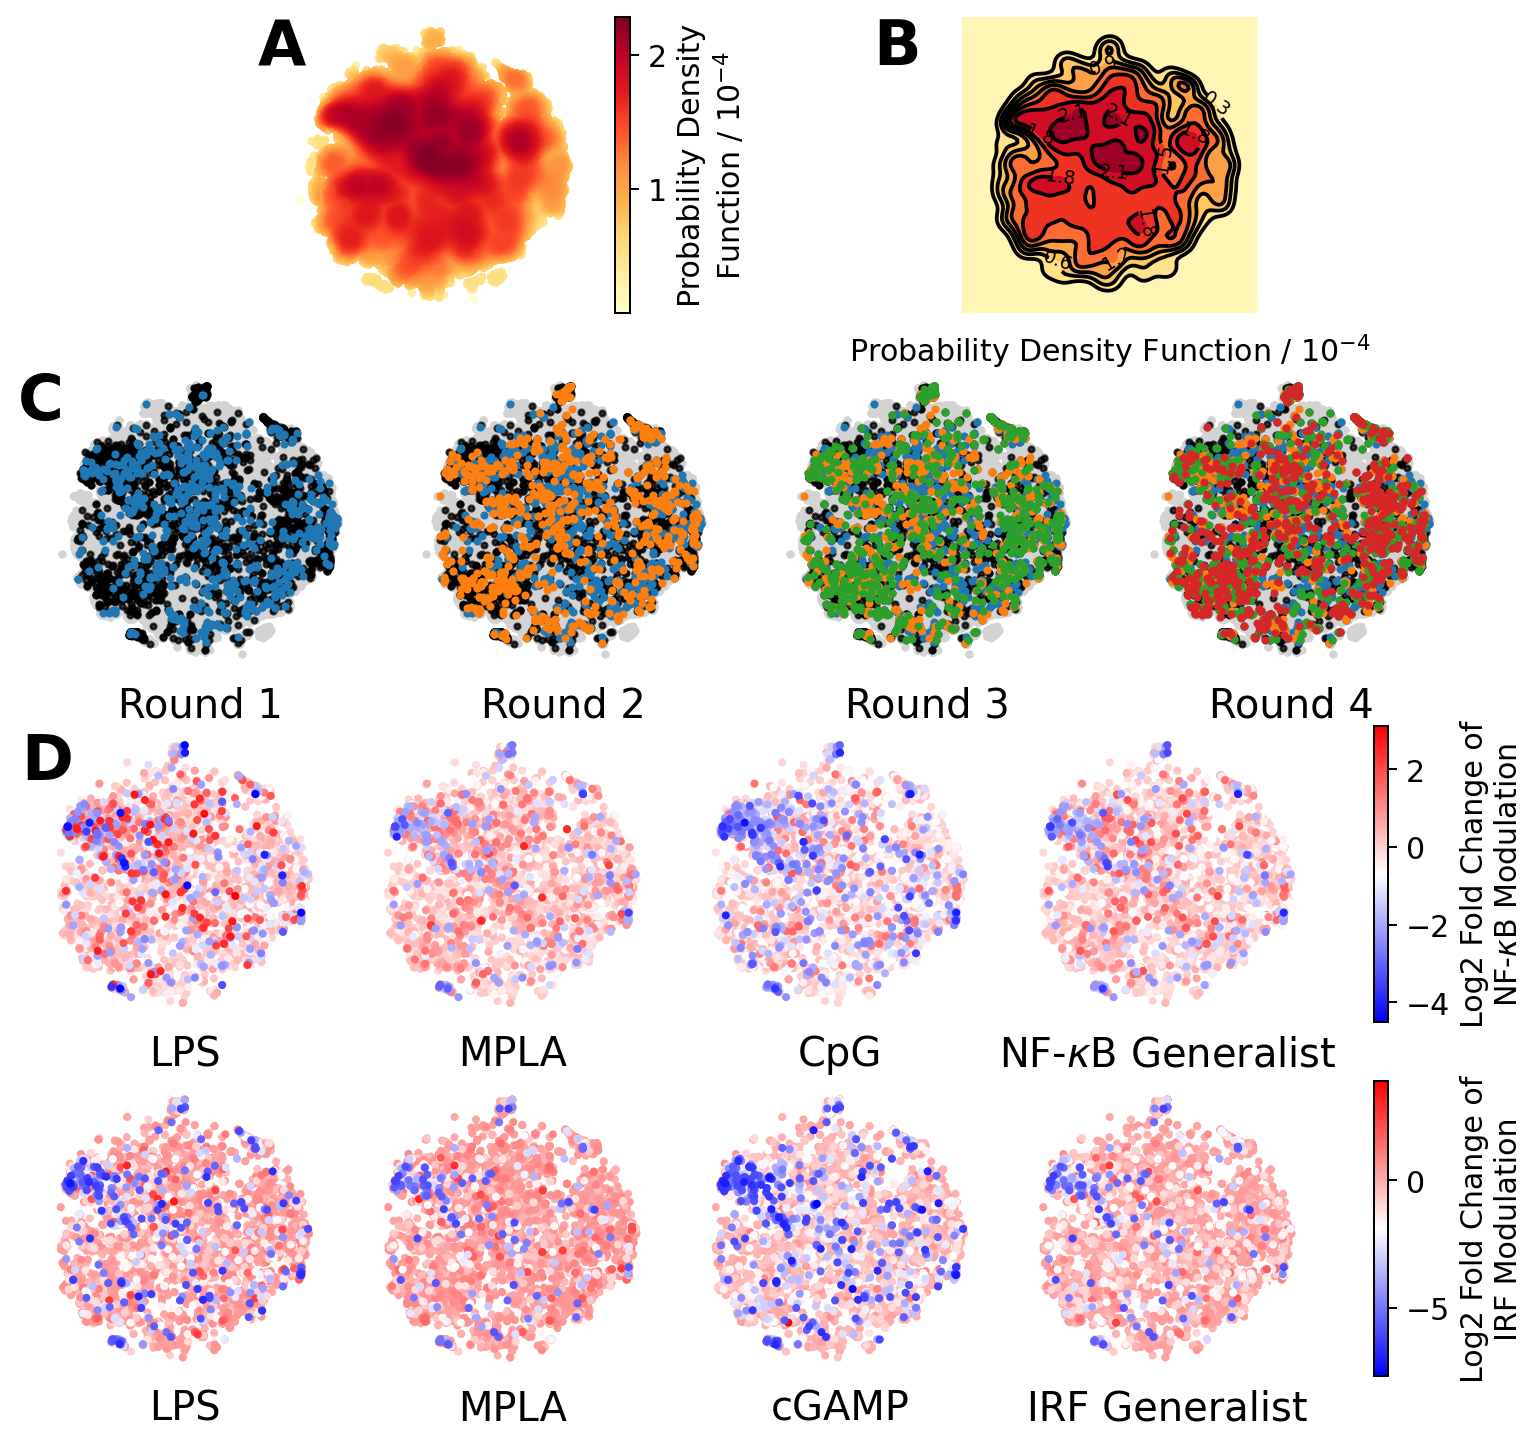

In [16]:
plt.rcParams.update({'font.size': 12})
# fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20), dpi=300)
fig, axes = plt.subplot_mosaic('AABB;CDEF;GHIJ;KLMN', figsize=(10, 10), dpi=180)
ms = 5
panel_label_size = 25
label_size = 16

# KDE ----------------------------------------------------
ax = axes['A']
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# ax.scatter(x, y, c=z, s=ms, cmap='YlOrRd')
pcm = ax.scatter(
            x, 
            y, 
            s=ms, 
            c=z * 10 ** 4, 
            cmap='YlOrRd',
            norm=Normalize(),
            rasterized=True
        )
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
fig.colorbar(pcm, ax=ax, label='Probability Density\nFunction / $10^{-4}$')
ax.set_aspect('equal')
ax.text(-0.1,1.0, 'A',  transform=ax.transAxes, fontsize=panel_label_size, fontweight='bold', va='top')

ax = axes['B']
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f * 10 ** 4, cmap='YlOrRd')
ax.imshow(np.rot90(f * 10 ** 4), cmap='YlOrRd', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f * 10 ** 4, colors='k')
ax.clabel(cset, inline=1, fontsize=7.5)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_aspect('equal')
ax.text(-0.3,1.0, 'B',  transform=ax.transAxes, fontsize=panel_label_size, fontweight='bold', va='top')
ax.set_xlabel('Probability Density Function / $10^{-4}$')

# By-round distribution -------------------------------------
name_iter = [1, 2, 3, 4]
current_cand_id_list = [candidates_df[candidates_df['iteration'] == j]['Catalog'].values.astype('int') for j in name_iter]
for j in range(4):
    current_cand_id = current_cand_id_list[j]
    ax = axes[['C', 'D', 'E', 'F'][j]]
    ax.scatter(X_embed[:-2674,0], X_embed[:-2674,1], label='Compound searching space', s=ms, color='lightgrey', rasterized=True)
    ax.scatter(X_embed[-2674:,0], X_embed[-2674:,1], s=ms, color='black', alpha=0.75, rasterized=True)
    for k in range(j+1):
        ax.scatter(X_embed[current_cand_id_list[k],0], X_embed[current_cand_id_list[k],1], s=ms, alpha=1)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel(f'Round {name_iter[j]}', fontsize=label_size)
    ax.set_frame_on(False)
ax = axes['C']
ax.text(-0.1,1.0, 'C',  transform=ax.transAxes, fontsize=panel_label_size, fontweight='bold', va='top')

# By-objective illustration ---------------------------------
for i in range(2):
    if i == 0:
        vmin, vmax = vmin_abs, vmax_abs
    if i == 1:
        vmin, vmax = vmin_lum, vmax_lum
    for j in range(4):
        obj = objs[i,j]
        ax = axes[[['G', 'H', 'I', 'J'], ['K', 'L', 'M', 'N']][i][j]]
        ax.set_frame_on(False)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        sorted_series = candidates_df_2[obj].sort_values(key=lambda x: np.abs(np.log2(x)))
        pcm = ax.scatter(
            X_exp[sorted_series.index,0], 
            X_exp[sorted_series.index,1], 
            s=ms, 
            c=sorted_series.apply(lambda x: np.log2(x)), 
            cmap='bwr',
            norm=Normalize(vmin=vmin, vmax=vmax),
            rasterized=True
        )
        ax.set_xlabel(obj.split()[0], fontsize=label_size)
        ax.set_aspect('equal')
        ax_c = [[axes['G'], axes['H'], axes['I'], axes['J']], [axes['K'], axes['L'], axes['M'], axes['N']]][i]
        pathway = ['NF-$\kappa$B', 'IRF'][i]
    fig.colorbar(pcm, ax=ax_c, label=f'Log2 Fold Change of\n{pathway} Modulation', fraction=0.05)
axes['J'].set_xlabel('NF-$\kappa$B Generalist', fontsize=label_size)
axes['N'].set_xlabel('IRF Generalist', fontsize=label_size)
ax = axes['G']
ax.text(-0.1,1.0, 'D',  transform=ax.transAxes, fontsize=panel_label_size, fontweight='bold', va='top')

plt.savefig('latent-integrate.pdf', bbox_inches='tight')
plt.savefig('latent-integrate.png', bbox_inches='tight')
plt.savefig('latent-integrate.svg', bbox_inches='tight')
plt.savefig('Fig3.pdf', bbox_inches='tight')
plt.show()